In [1]:
# Author: Dr James K Ruffle
# Email: j.ruffle@ucl.ac.uk

In [1]:
import pandas as pd
import glob
from graph_tool.all import *; import graph_tool.all as gt
import gravis as gv
import numpy as np
from tqdm import tqdm
from bs4 import BeautifulSoup
import seaborn as sns

import os
print(os.getcwd())

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


/Users/sam/Desktop/james-interative-graph-personalised/graph


In [3]:
df = pd.read_csv('../simulated_data/simulated_data.csv',index_col=0)
df.head()

/var/folders/sw/h3fq4qtj0jj9kh01vd62l8980000gn/T/ipykernel_5402/571048350.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../simulated_data/simulated_data.csv',index_col=0)


,username,icon,Trial name,First name,Last name,DOB,Address,email,Latitude,Longitude,...,Forum User,Symptom Logger,Frequent Check In,Diamond Forum Contributor,Big App Engagement,Appointment Attendance,7 Day Symptom Logger,Has Logged Symptoms,Checking In,Ruby Contributor
0,enragedBass3,../../assets/icons/sharks_235052.png,MindfulAI,Shannon,Clarke,1993-01-10,792 Jones shoal\nWest Bryanmouth\nCW6M 0RR,Shannon_Clarke@mindfulai.com,52.66277,-2.01111,...,NaN,NaN,NaN,NaN,NaN,../../assets/badges/appointment_attendance.png,../../assets/badges/7_day_symptom_logger.png,../../assets/badges/has_logged_symptoms.png,../../assets/badges/checking_in.png,NaN
1,thrilledCaviar1,../../assets/icons/bunny_1469202.png,MindfulAI,Richard,Hayden,1973-11-20,613 Wood viaduct\nStanleyborough\nG6U 3QH,Richard_Hayden@mindfulai.com,51.40148,-1.32471,...,NaN,NaN,../../assets/badges/frequent_check_in.png,../../assets/badges/diamond_forum_contributor.png,NaN,NaN,../../assets/badges/7_day_symptom_logger.png,NaN,NaN,NaN
2,yearningBaboon5,../../assets/icons/lion_2298426.png,MindfulAI,Jeremy,Swarey,1996-02-19,9 Miller fall\nLloydmouth\nDD8B 4WF,Jeremy_Swarey@mindfulai.com,53.69786,-2.68758,...,NaN,NaN,../../assets/badges/frequent_check_in.png,NaN,NaN,NaN,../../assets/badges/7_day_symptom_logger.png,../../assets/badges/has_logged_symptoms.png,../../assets/badges/checking_in.png,NaN
3,pacifiedTuna1,../../assets/icons/cow_1998610.png,MindfulAI,Norman,Kearney,1988-09-17,7 Megan lock\nKarlside\nL3 8HY,Norman_Kearney@mindfulai.com,55.82737,-4.05730,...,../../assets/badges/forum_user.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,emptyChough6,../../assets/icons/elephant_10197317.png,MindfulAI,Donald,Hernandez,1985-04-05,32 Norris corners\nNew Alexandraberg\nHU01 2FE,Donald_Hernandez@mindfulai.com,52.68333,0.93333,...,NaN,NaN,NaN,../../assets/badges/diamond_forum_contributor.png,NaN,NaN,NaN,NaN,../../assets/badges/checking_in.png,NaN


In [4]:
#Implement focus on one specific user
user='boastfulMare6'

print(user in df['username'].values)

df['focus_on_user']=1
df.loc[df['username']==user,'focus_on_user']=2
df.head()

True


,username,icon,Trial name,First name,Last name,DOB,Address,email,Latitude,Longitude,...,Symptom Logger,Frequent Check In,Diamond Forum Contributor,Big App Engagement,Appointment Attendance,7 Day Symptom Logger,Has Logged Symptoms,Checking In,Ruby Contributor,focus_on_user
0,enragedBass3,../../assets/icons/sharks_235052.png,MindfulAI,Shannon,Clarke,1993-01-10,792 Jones shoal\nWest Bryanmouth\nCW6M 0RR,Shannon_Clarke@mindfulai.com,52.66277,-2.01111,...,NaN,NaN,NaN,NaN,../../assets/badges/appointment_attendance.png,../../assets/badges/7_day_symptom_logger.png,../../assets/badges/has_logged_symptoms.png,../../assets/badges/checking_in.png,NaN,1
1,thrilledCaviar1,../../assets/icons/bunny_1469202.png,MindfulAI,Richard,Hayden,1973-11-20,613 Wood viaduct\nStanleyborough\nG6U 3QH,Richard_Hayden@mindfulai.com,51.40148,-1.32471,...,NaN,../../assets/badges/frequent_check_in.png,../../assets/badges/diamond_forum_contributor.png,NaN,NaN,../../assets/badges/7_day_symptom_logger.png,NaN,NaN,NaN,1
2,yearningBaboon5,../../assets/icons/lion_2298426.png,MindfulAI,Jeremy,Swarey,1996-02-19,9 Miller fall\nLloydmouth\nDD8B 4WF,Jeremy_Swarey@mindfulai.com,53.69786,-2.68758,...,NaN,../../assets/badges/frequent_check_in.png,NaN,NaN,NaN,../../assets/badges/7_day_symptom_logger.png,../../assets/badges/has_logged_symptoms.png,../../assets/badges/checking_in.png,NaN,1
3,pacifiedTuna1,../../assets/icons/cow_1998610.png,MindfulAI,Norman,Kearney,1988-09-17,7 Megan lock\nKarlside\nL3 8HY,Norman_Kearney@mindfulai.com,55.82737,-4.05730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,emptyChough6,../../assets/icons/elephant_10197317.png,MindfulAI,Donald,Hernandez,1985-04-05,32 Norris corners\nNew Alexandraberg\nHU01 2FE,Donald_Hernandez@mindfulai.com,52.68333,0.93333,...,NaN,NaN,../../assets/badges/diamond_forum_contributor.png,NaN,NaN,NaN,NaN,../../assets/badges/checking_in.png,NaN,1


In [5]:
# #simulate award badges for users
# #similar to git achievements
badge_list = []
badges = glob.glob('../../assets/badges/*png')
for b in range(len(badges)):
    png = badges[b]
    badge_list.append(badges[b].split('/')[-1].split('.')[0].replace("_", " ").title())

In [6]:
g = Graph(directed=False)
username = g.new_vertex_property("string")
icon = g.new_vertex_property("string")
trial_name = g.new_vertex_property("string")
online_status=g.new_vertex_property("string")
total_points=g.new_vertex_property('int')
total_attendance_points=g.new_vertex_property('int')
total_log_points=g.new_vertex_property('int')
total_check_in_points=g.new_vertex_property('int')
total_answered_question_points=g.new_vertex_property('int')
total_spoke_to_bot_points=g.new_vertex_property('int')
badges = g.new_vertex_property("string")
user_focus = g.new_vertex_property("double")

for v, row in df.iterrows():
    node = g.add_vertex()
    username[v]=(row['username'])
    icon[v]=(row['icon'])
    trial_name[v]=(row['Trial name'])
    online_status[v]=(np.random.choice(['No','Yes'], p=[0.3,0.7]))
    total_points[v]=(row['Total points'])
    total_attendance_points[v]=(row['Total attendance points'])
    total_log_points[v]=(row['Total log points'])
    total_check_in_points[v]=(row['Total check in points'])
    total_answered_question_points[v]=(row['Total answered question points'])
    total_spoke_to_bot_points[v]=(row['Total spoke to bot points'])
    user_focus[v]=(row['focus_on_user'])
    
    badges_won = row[badge_list][row[badge_list].notnull()]
    if len(badges_won)>0:
        badges[v]='<br><center>'
        for b in badges_won:
            badges[v]+='<img src='+b+' style="margin:10px;max-height:40px;max-width:40px;"></img>'
        badges[v]+='</center>'
    else:
        badges[v]=''
    
g.vp["username"]=username
g.vp["image"]=icon
g.vp["trial_name"]=trial_name
g.vp["online_status"]=online_status
g.vp["total_points"]=total_points
g.vp["total_attendance_points"]=total_attendance_points
g.vp["total_log_points"]=total_log_points
g.vp["total_check_in_points"]=total_check_in_points
g.vp["total_answered_question_points"]=total_answered_question_points
g.vp["total_spoke_to_bot_points"]=total_spoke_to_bot_points
g.vp["user_focus"]=user_focus

#force highlighted user to be shown as online
for v in g.vertices():
    if g.vp['username'][v]==user:
        g.vp['online_status'][v]='Yes'
    
print("Nodes primed!")
print("")
print(g)

Nodes primed!

<Graph object, undirected, with 150 vertices and 0 edges, 11 internal vertex properties, at 0x2a7d6a7d0>


quick point comparison heatmap...


<Axes: >

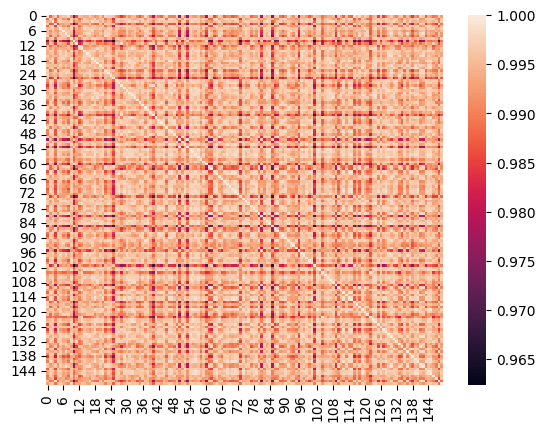

In [7]:
point_comparison = df.filter(regex='Cumulative|username').iloc[:,1:]
adj = point_comparison.T
adj = adj.corr().values

print("quick point comparison heatmap...")
sns.heatmap(adj)

In [8]:
idx = adj.nonzero()
weights = adj[idx]
g.add_edge_list(np.transpose(idx))

ew = g.new_ep("double")
ew.a = weights 
g.ep['weight'] = ew

gt.remove_self_loops(g)

tree = gt.min_spanning_tree(g,weights=g.ep.weight)
g.ep["minspanningtree"] = tree

g.save("participant_graph.xml.gz")
print(g)

thresh = np.percentile(g.ep.weight.get_array(),97)
edge_filter = g.new_edge_property("bool") 
for e in g.edges(): 
        if g.ep.weight[e] > thresh:
            edge_filter[e] = True 
        else: 
            edge_filter[e] = False 
g.edge_properties["edge_filter"]=edge_filter

# g.set_edge_filter(tree)
g.set_edge_filter(g.ep['edge_filter'])
print(g)

<Graph object, undirected, with 150 vertices and 22350 edges, 11 internal vertex properties, 2 internal edge properties, at 0x2a7d6a7d0>
<Graph object, undirected, with 150 vertices and 524 edges, 11 internal vertex properties, 3 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2a7d6a7d0, at 0x2bbfcd050>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2a7d6a7d0, at 0x2bbfcda90>, False), at 0x2a7d6a7d0>


In [9]:
ew_focus_on_user = g.new_ep("double")

for e in g.edges():
    if g.vp['username'][e.source()] == user or g.vp['username'][e.target()] == user:
        ew_focus_on_user[e]=2
    else:
        ew_focus_on_user[e]=1
        
g.edge_properties["ew_focus_on_user"]=ew_focus_on_user

gt.remove_parallel_edges(g)

In [10]:
fname = 'participant_graph_d3_js.html'
# fname = '../../assets/participant_graph_d3_js.html'
if len(glob.glob(fname))>0:
    os.remove(fname)
    
g.vp['color'] = g.new_vp('string')
g.vp['hover'] = g.new_vp('string')
# g.vp['click'] = g.new_vp('string')
# g.vp['image'] = g.new_vp('string')
g.vp['opacity'] = g.new_vp('float')

for v in tqdm(g.vertices(),total=g.num_vertices()):
    fname_image = g.vp['image'][v]
    g.vp['hover'][v] = '<center><strong>'+str(g.vp['username'][v])+'\nTotal points: '+str(g.vp['total_points'][v])+'\n</center></strong>'
    g.vp['hover'][v]+='<br><center><img src='+fname_image+' style="margin:10px;max-height:150px;max-width:150px;"></img>'
    g.vp['hover'][v]+=badges[v]
    g.vp['opacity'][v]=0.5
    
    #random online, offline color symboliser, offline = #ffb3ba/first
    if g.vp['online_status'][v]=='Yes':
        g.vp['color'][v]='#baffc9'
    else:
        g.vp['color'][v]='#ffb3ba'
    
g.gp['background_color'] = g.new_gp('string', val='#bae1ff')
g.gp['opacity'] = g.new_gp('double', val=0.1)

fig = gv.d3(g,
#   graph_height=800, 
#   details_height=450,
            show_details=False,
show_details_toggle_button=False,
#   zoom_factor=0.3,
  use_node_size_normalization=True,
  use_edge_size_normalization=True,
  node_size_data_source='user_focus',
  node_label_data_source='username',
    edge_size_data_source='ew_focus_on_user',
  edge_label_data_source='weight',
 show_node_label=False, 
 node_hover_neighborhood=True,
 show_node_label_border=False,
#  node_label_size_factor=0.55,
 use_many_body_force=True,
 edge_curvature=0.3,
  show_edge_label=False,
   show_edge_label_border=True,
#     many_body_force_strength=- 150.0,
        use_collision_force=True,
  node_size_normalization_min=20,
node_size_normalization_max=75,
  edge_size_normalization_min=0.5,
# edge_size_normalization_max=15,
layout_algorithm_active=True,
#             links_force_distance=450,
 )

fig.export_html(fname)
del fig

100%|██████████████████████████████████████| 150/150 [00:00<00:00, 70793.92it/s]


In [2]:
print("Now adjusting the HTML file for asset location, font, and []...")
fname = "/Users/sam/Desktop/james-interative-graph-personalised/graph/participant_graph_d3_js.html"
# Open test.html for reading
with open(fname) as html_file:
    soup = BeautifulSoup(html_file.read(), features='html.parser')

replaceString = 'assets/'
new_text = str(soup).replace('"Lucida Console", Monaco, monospace','"sans-serif"')

#may need this later for dependency changes
new_text = str(soup).replace("../../assets/", replaceString)
# new_text = str(soup).replace("/code/assets/", replaceString)

# new_text = new_text.replace('font-size: 8px','font-size: 15px')
# new_text = new_text.replace('font-size: 10px','font-size: 15px')
# new_text = new_text.replace('font-size: 9px','font-size: 15px')
# new_text = new_text.replace('font-size: 11px','font-size: 15px')

new_text = BeautifulSoup(new_text).prettify()
with open(fname, mode='w') as new_html_file:
    new_html_file.write(new_text)

Now adjusting the HTML file for asset location, font, and []...
